# The BB84 Quantum Cryptography Algorithm

## Quantum Key Distribution using Qiskit

Imagine two people, Alice wants to communicate a secret message to Bob over an insecure medium such as the Internet. Since the Internet is publicly available for anyone to intercept, a special encryption scheme must be developed such that Bob can only access Alice's message with a special "key". We will focus on the BB84 algorithm, which is a symmetric key distribution algorithm enabling Alice to securely communicate her message to Bob.

We will import the required libraries

In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy.random import randint
import numpy as np
from qiskit.providers.aer import QasmSimulator
%matplotlib inline


### Encryption using Quantum Cryptography

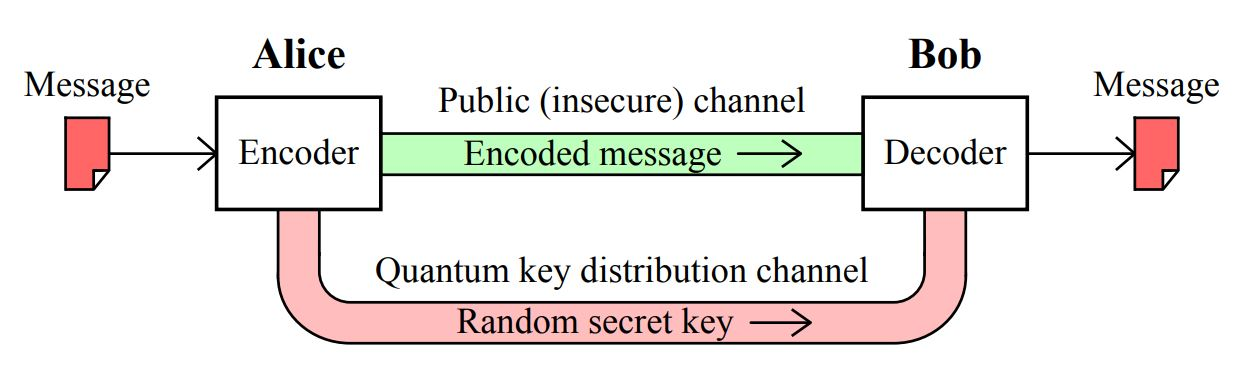

(credit:norwegiancreations.com)

But what are the quantum and classical channels? A classical channel could be a communication wire like a telephone line where electrical signals represent bits or encoded information we send. A quantum communication channel can be a fiber optic cable( as quantum cryptography is implemented using polarization scrambling) through which we can send individual photons (particles of light). The polarization states are used to represent qubits.

### Step 1: Generate Binary Strings

Alice will generate two strings(consisting of 0s and 1s). One string will encode the basis for each qubit and the other string will encode its state.

0 in the hadamard basis will be represented as state $|+\rangle$ and 1 in the hadamard basis is represented as state $|-\rangle$. The hadamard basis can be seen as the result of applying a hadamard gate on the computational basis $|0\rangle$ or $|1\rangle$. The computational basis will be represented by 0 and hadamard basis by 1. Let us suppose that Alice wants to generate a 32 bit string. The number of qubits needed is 32. We will generate two random strings that represent Alice's state and the basis that Alice uses for encoding the state( the information about which basis Alice uses for encoding the state is very important for Bob to decrypt the message using the key)

In [2]:
num_qubits = 32

alice_basis = np.random.randint(2, size=num_qubits)
alice_state = np.random.randint(2, size=num_qubits)
bob_basis = np.random.randint(2, size=num_qubits)


print(f"Alice's State:\t {np.array2string(alice_state)}")
print(f"Alice's Bases:\t {np.array2string(alice_basis)}")
print(f"Bob's Bases:\t {np.array2string(bob_basis)}")
      



Alice's State:	 [1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0]
Alice's Bases:	 [0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0]
Bob's Bases:	 [0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0]


Now, when Alice's State is 1 and her basis is 0, this means that she is using the computational basis to encode the state 1. However, if Alice's state is 1 and her basis is 1, that means she is using the hadamard gate to encode the state 1 which will result in $|-\rangle$

### Step 2: Creating the circuit using BB84 protocol

We will use this algorithm to construct the circuit

1. Whenever Alice wants to encode 1 in a qubit, she applies an X gate to the qubit. To encode 0, no action is needed as the qubits in qiskit are by default initialized to state 0 and applying an X gate is the equivalent of applying NOT.


2. Wherever she wants to encode it in the Hadamard basis, she applies an hadamard gate. No action is necessary to encode a qubit in the computational basis as the default basis in qiskit is the computational basis


3. She then *sends* the qubits to Bob


4. Bob measures the qubits according to his binary string. To measure a qubit in the Hadamard basis, he applies an hadamard gate to the corresponding qubit and then performs a measurement on the computational basis.

In [3]:
def bb84_circuit(state, basis, measurement_basis):
   
    #state: array of 0s and 1s denoting the state to be encoded
    #basis: array of 0s and 1s denoting the basis to be used for encoding
                #0 -> Computational Basis
                #1 -> Hadamard Basis
    #meas_basis: array of 0s and 1s denoting the basis to be used for measurement
                #0 -> Computational Basis
                #1 -> Hadamard Basis
    
    num_qubits = len(state)
    
    circuit = QuantumCircuit(num_qubits)

    # Sender prepares qubits
    for i in range(len(basis)):
        if state[i] == 1:
            bb84_circuit.x(i)
        if basis[i] == 1:
            bb84_circuit.h(i)
   

    # Measuring action performed by Bob
    for i in range(len(measurement_basis)):
        if measurement_basis[i] == 1:
            bb84_circuit.h(i)

       
    bb84_circuit.measure_all()
    
    return bb84_circuit

## Step 3: Creating the key 

Alice and Bob only keep the bits in the strings where the bases match. For example, in the example above only if Alice's encoding basis is 0 and Bob's measuring basis is 0 or its 1 and 1 the bits are kept

The probability that their bases match is $\frac{1}{2}$ as the probability that Alice chooses computational basis is $\frac{1}{2}$ and probability that Bob chooses computational basis is $\frac{1}{2}$ so the probability that both choose computational basis is 1/4 or the probability that both choose hadamard basis is ($\frac{1}{2}$*$\frac{1}{2}$) so in total the probability that both their bases match is $\frac{1}{2}$

Here are all the possibilities for the BB84 protocol

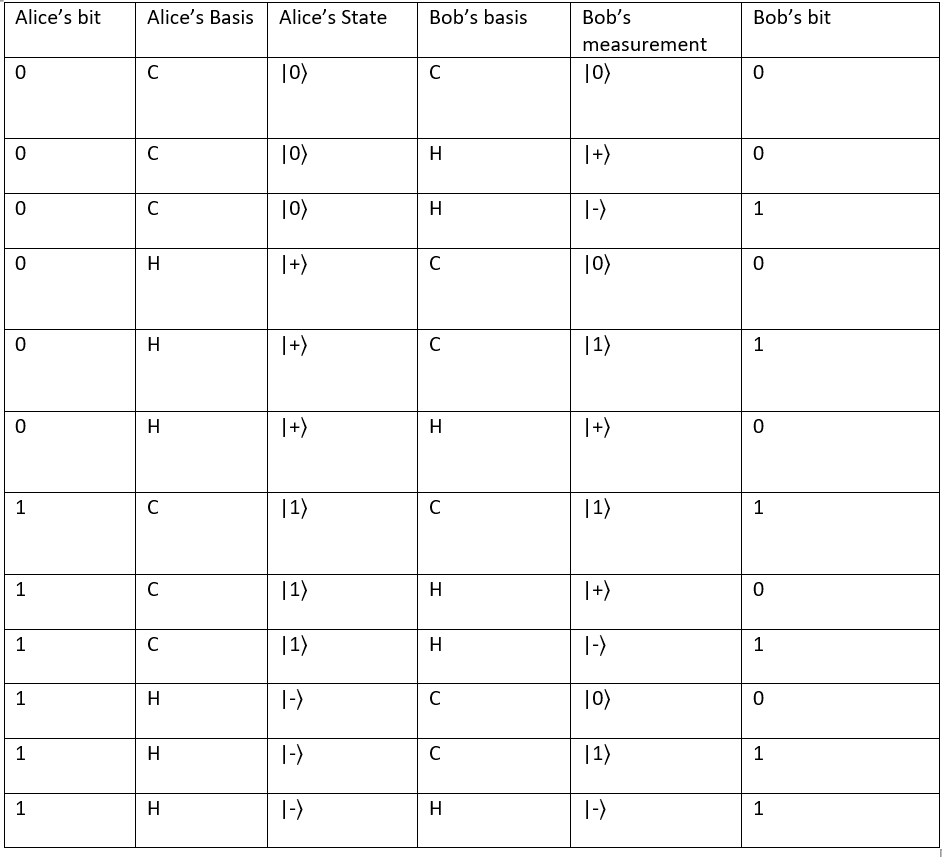

### Step 4: Executing the circuit

We will keep the bits that match so when alice_basis[i] == bob_basis[i]

In [ ]:
circuit = bb84_circuit(alice_state, alice_basis, bob_basis)
key = execute(circuit.reverse_bits(),backend=QasmSimulator(),shots=1).result().get_counts().most_frequent()
encryption_key = ''
for i in range(num_qubits):
    if alice_basis[i] == bob_basis[i]:
         encryption_key += str(key[i])
print(f"Key: {encryption_key}")


This is the key Bob will use for decrypting Alice's message